## <center> ACM India and RBCDSAI Joint Summer School on DS/AI/ML
### <center> Hands-on Tutorial Day-7
### <center> Tree-based approaches for classification

**Contents:**  
1. Decision Trees  
1a. Building decision trees <br />
1b. Analysing decision trees<br />
1c. Getting feature importance in trees  <br />
1d. Decision trees vs logistic regression<br />
1e. Decision trees: a high variance model<br />
2. Bagging classifier
3. Random Forest (RF) classification  
4. Adaboost



In [ ]:
# Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 8.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1a6c95c60649816ac1bcab4e11d034497bfda6e0c05daea85c59c2eccf2c75a8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import mglearn

### Building Decision trees
The codes will show how the decision tree has been built for classifying the data into two classes

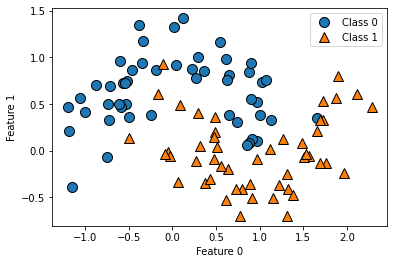

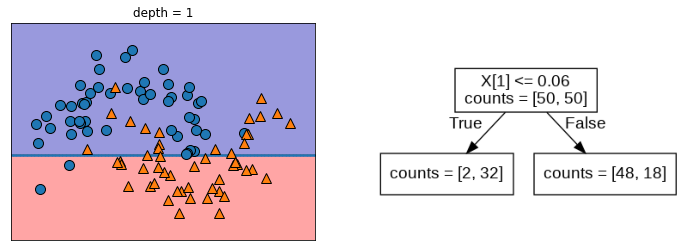

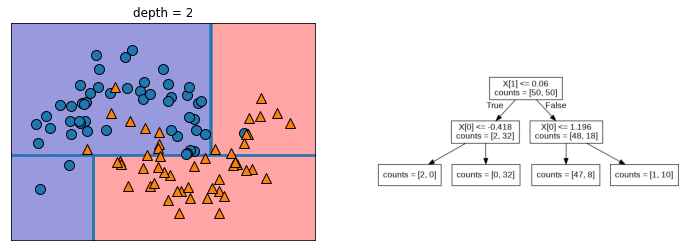

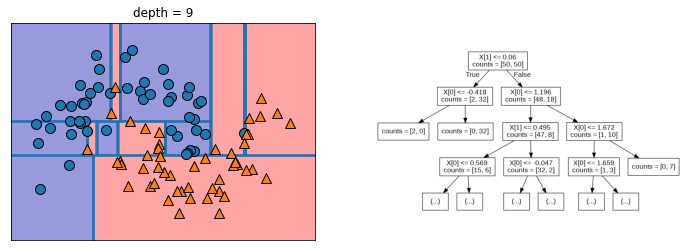

In [ ]:
import graphviz
mglearn.plots.plot_tree_progressive()

In [ ]:
# Load dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [ ]:
# No.of samples in each class
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [ ]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size = 0.3, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the variable for Decision tree classifier
tree0 = DecisionTreeClassifier(random_state=0)
tree0.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree0.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree0.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


![DT_arch.jpeg](https://drive.google.com/uc?export=view&id=1UVJScDlYZhzX0suxof6sLMv4PM6KUOuY)

![stop_cri.jpeg](https://drive.google.com/uc?export=view&id=1kSPzo2XchoONeqAMXlypozrzvLT4JS88)


In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.947


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_choice = {
    "max_leaf_nodes": np.linspace(20,100,30).astype(int),
    "max_depth": list(range(3,11))
}
rnd_search_cv = RandomizedSearchCV(tree, param_choice, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.best_params_)
tuned_tree = rnd_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=61, random_state=0)
{'max_leaf_nodes': 61, 'max_depth': 4}


In [ ]:
tree = DecisionTreeClassifier(max_depth=rnd_search_cv.best_params_['max_depth'],
                              max_leaf_nodes=rnd_search_cv.best_params_['max_leaf_nodes'],
                              random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.959


### Analyzing decision trees

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

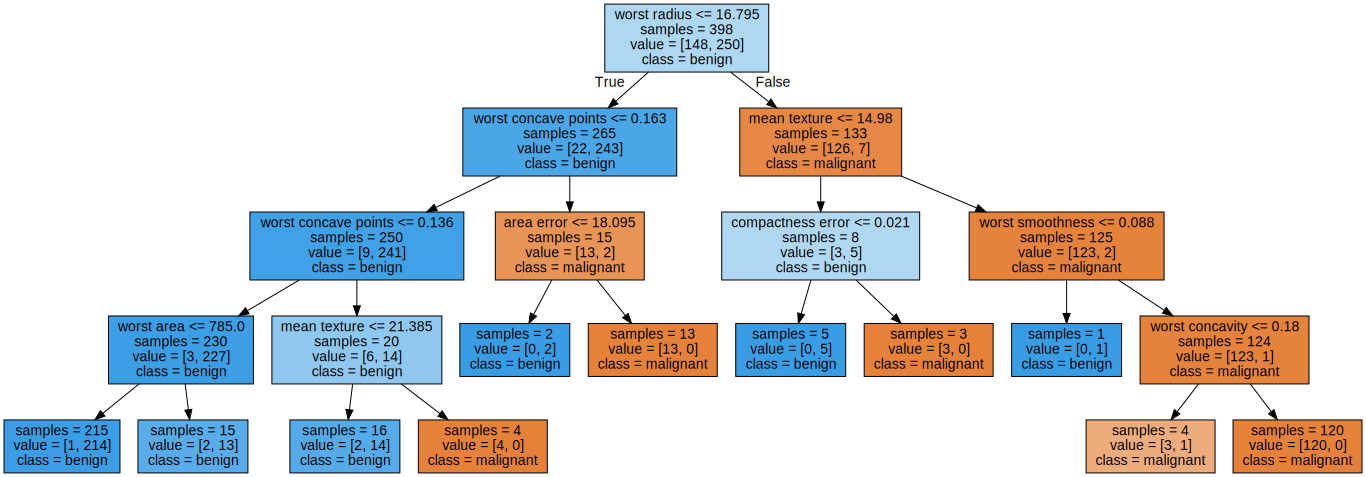

In [ ]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Feature importance in Trees
Feature importance score is the relative importance of the feature in predicting the class of the sample

In [ ]:
# Feature importance for the cancer data
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.05970833 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01975621 0.         0.0213709  0.         0.
 0.         0.         0.75407533 0.         0.         0.00264643
 0.011125   0.         0.00275754 0.12856027 0.         0.        ]


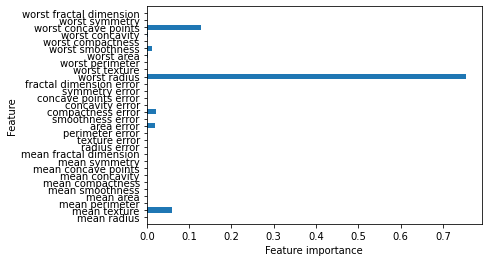

In [ ]:
# Plotting the feature importance score 

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

## Evaluation metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


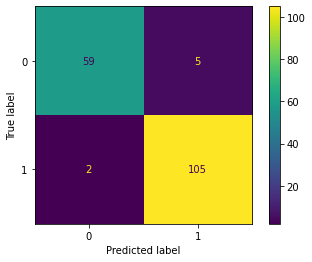

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
y_pred = tree.predict(X_test)
plot_confusion_matrix(tree,X_test,y_test)

Text(0, 0.5, 'True Positive Rate')

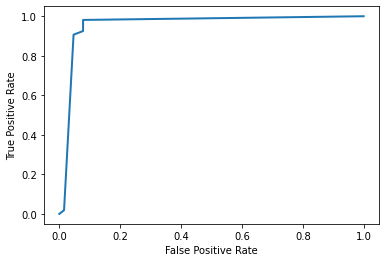

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_bag = roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Decision trees vs logistic regression

![LR vs DT1.jpeg](https://drive.google.com/uc?export=view&id=1WXQKUNjlPgCz88EKsPrFq4qOqPIMf_k0)


![LR vs DT2.jpeg](https://drive.google.com/uc?export=view&id=1FVaALukKs9qIpJ7gJtfMFwJDoCuL7TAk)


## Decision Trees: High variance model

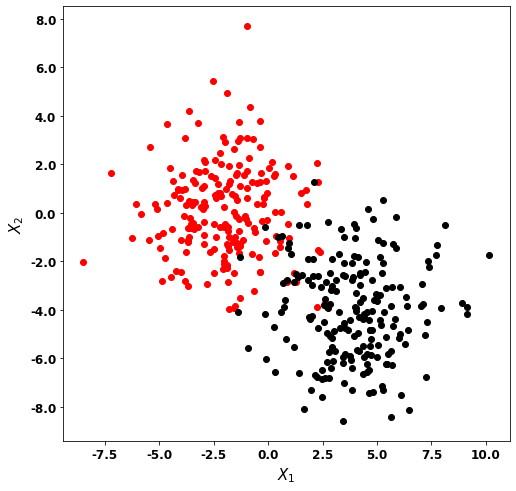

In [ ]:
import sklearn.datasets as ds
x,y=ds.make_blobs(n_samples=(200,200), n_features=2,centers=((-2,0),(4,-4)),
                  cluster_std=2,random_state=42)

# Visualizing the dataset obtained
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(x[y==0,0],x[y==0,1],c='r')
ax.scatter(x[y==1,0],x[y==1,1],c='black')
ax.set_xlabel(r'$X_1$',fontsize=15)
ax.set_ylabel(r'$X_2$',fontsize=15)
fontproperties = {'weight' : 'bold', 'size' : '12'}
ax.set_xticklabels(ax.get_xticks(), fontproperties)
ax.set_yticklabels(ax.get_yticks(), fontproperties);

In [ ]:
# fitting two models on subset dataset
x1=x[:200,:]
x2=x[200:,:]
y1=y[:200]
y2=y[200:]

tree1=DecisionTreeClassifier(max_depth=1)
tree2=DecisionTreeClassifier(max_depth=1)
tree1.fit(x1,y1)
tree2.fit(x2,y2)

DecisionTreeClassifier(max_depth=1)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree1, out_file="tree1.dot", class_names=["0", "1"],
                feature_names=['x1','x2'], impurity=False, filled=True)
export_graphviz(tree2, out_file="tree2.dot", class_names=["0", "1"],
                feature_names=['x1','x2'], impurity=False, filled=True)

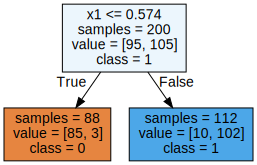

In [ ]:
with open("tree1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

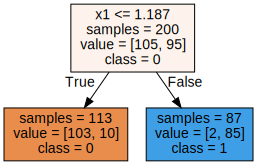

In [ ]:
with open("tree2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Bagging Classifiers

![bag.jpeg](https://drive.google.com/uc?export=view&id=1jeCcMvWNAKkoxQ2VQh1dVk9rOnS3XQC9)


In [ ]:
from sklearn.ensemble import BaggingClassifier
max_depth = 2

# Set the maximum depth to be max_depth and use 100 estimators
n_estimators = 100
basemodel=DecisionTreeClassifier(max_depth=rnd_search_cv.best_params_['max_depth'], 
                    max_leaf_nodes=rnd_search_cv.best_params_['max_leaf_nodes'],
                    random_state=0)

bagging = BaggingClassifier(base_estimator=basemodel, 
                            n_estimators=n_estimators)
# Fit the model on the training set

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        max_leaf_nodes=61,
                                                        random_state=0),
                  n_estimators=100)

In [ ]:
print("Accuracy on training set: {:.3f}".format(bagging.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(bagging.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.959


Text(0, 0.5, 'True Positive Rate')

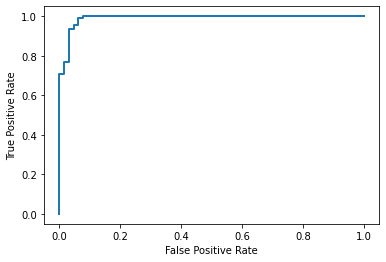

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_bag = roc_auc_score(y_test, bagging.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, bagging.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(bagging.estimators_[0],max_depth=2, out_file="bag1.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
export_graphviz(bagging.estimators_[1], max_depth=2,out_file="bag2.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

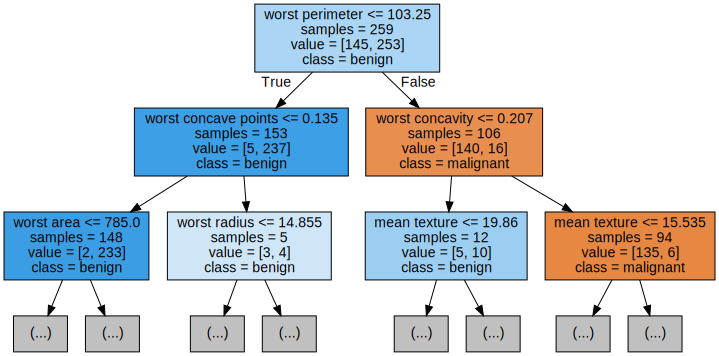

In [ ]:
with open("bag1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

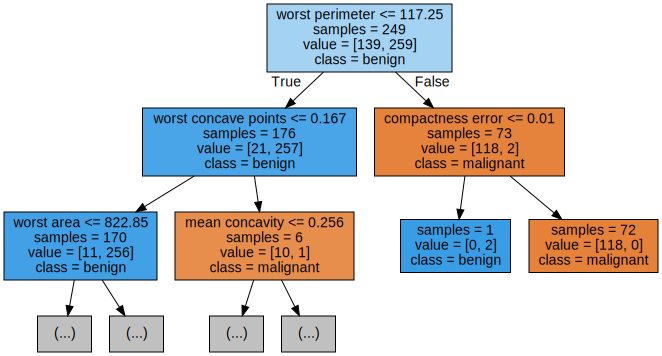

In [ ]:
with open("bag2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Random forest classifier


![rf.jpeg](https://drive.google.com/uc?export=view&id=1bshha2H4X8a3hIusPbrtebTg8LUH7Ypw)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5,n_estimators=100,
                            max_features='sqrt')

# fit the model in training dataset
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features='sqrt')

In [ ]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.959


Text(0, 0.5, 'True Positive Rate')

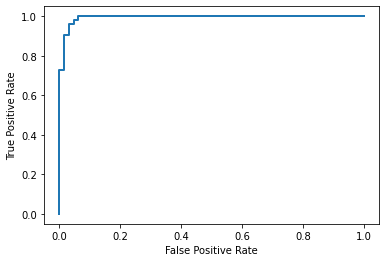

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_bag = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test,
                                 rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(rf.estimators_[0],max_depth=2, 
                out_file="rf1.dot", class_names=["malignant", 
                                                 "benign"],
                feature_names=cancer.feature_names, impurity=False,
                filled=True)
export_graphviz(rf.estimators_[1], max_depth=2,out_file="rf2.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

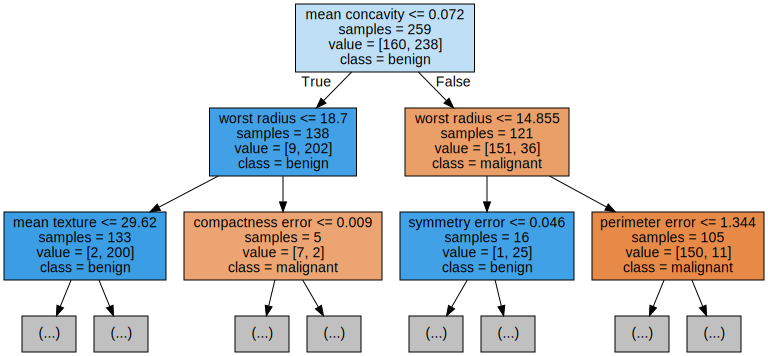

In [ ]:
with open("rf1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

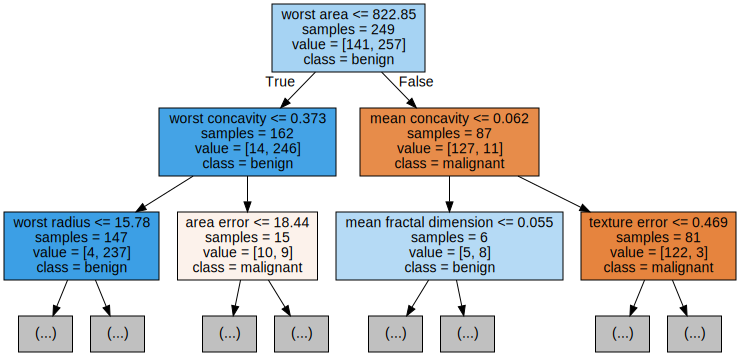

In [ ]:
with open("rf2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Random forest on moon dataset

In [ ]:
from sklearn.datasets import make_moons
# Generate dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3,random_state=42)

In [ ]:
# Random forest model fitting
forest = RandomForestClassifier(max_depth=5,n_estimators=100,max_features='sqrt')
forest.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=5, max_features='sqrt')

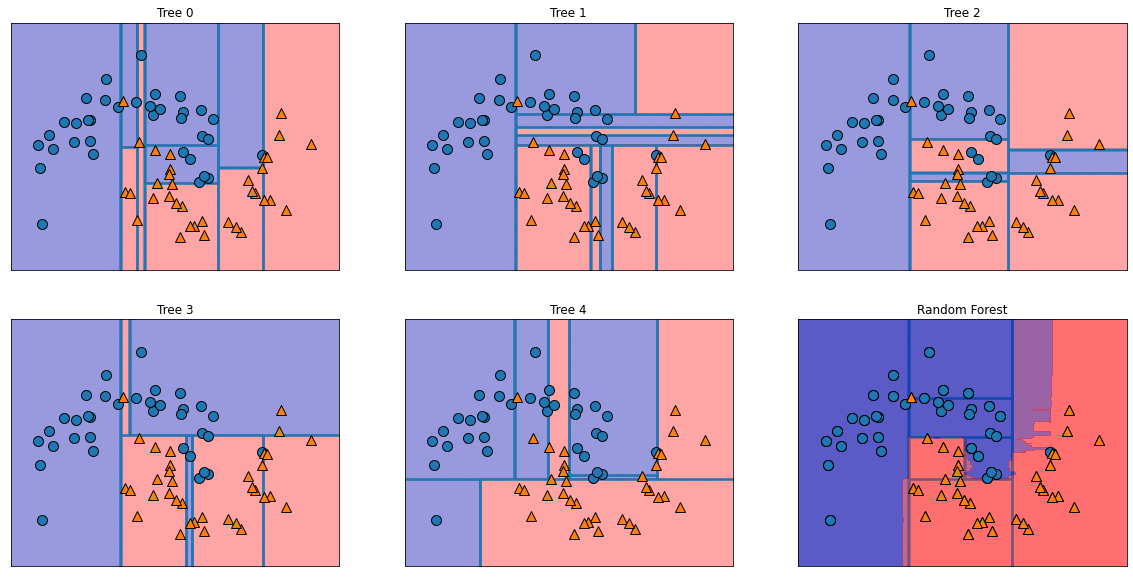

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X1_train, y1_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X1_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X1_train[:, 0], X1_train[:, 1], y1_train)

## Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:

ad = AdaBoostClassifier()

# fit the model in training dataset
ad.fit(X_train, y_train)


AdaBoostClassifier()

In [ ]:
print("Accuracy on training set: {:.3f}".format(ad.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ad.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


Text(0, 0.5, 'True Positive Rate')

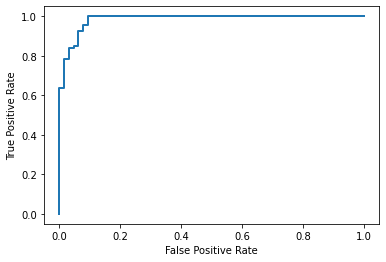

In [ ]:
# ROC curve

roc_bag = roc_auc_score(y_test, ad.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, ad.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:

export_graphviz(ad.estimators_[0], out_file="ad1.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
export_graphviz(ad.estimators_[1], out_file="ad2.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

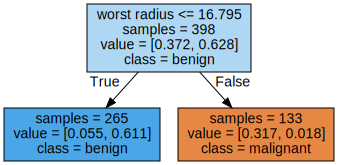

In [ ]:
with open("ad1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

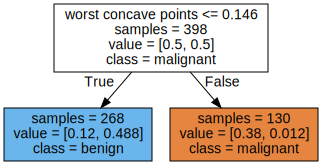

In [ ]:
with open("ad2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Adaboost on moon dataset

In [ ]:
# Random forest model fitting
ada = AdaBoostClassifier()
ada.fit(X1_train, y1_train)

AdaBoostClassifier()

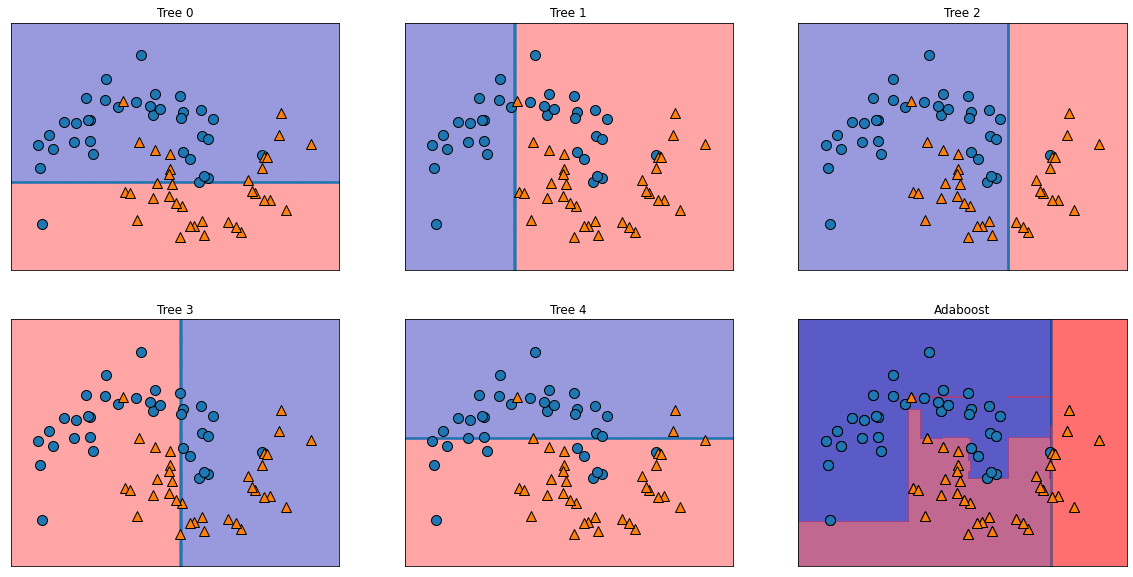

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X1_train, y1_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, X1_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Adaboost")
mglearn.discrete_scatter(X1_train[:, 0], X1_train[:, 1], y1_train)

**Sources:**  
1. [Stat 508 - Applied data mining and statistical learning](https://online.stat.psu.edu/stat508/lesson/9/9.2/9.2.6)  
2. [Hands-on machine learning with Scikit-Learn by A.Geron](https://github.com/ageron/handson-ml3)  

